In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('fake_job_postings.csv')
df.columns #names of columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
df.shape #size of dataset

(17880, 18)

In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [7]:
cat_columns = df.columns[df.dtypes == object]
df[cat_columns] = df[cat_columns].fillna('Empty')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Empty,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Empty,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,Empty,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Empty,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,Empty,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",Empty,Empty,Empty,Job OverviewApex is an environmental consultin...,Empty,Empty,0,0,0,Empty,Empty,Empty,Empty,Empty,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Empty,Empty,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Empty,Empty,Empty,Empty,Empty,0
8,9,HP BSM SME,"US, FL, Pensacola",Empty,Empty,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Empty,0,1,1,Full-time,Associate,Empty,Information Technology and Services,Empty,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",Empty,Empty,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Empty,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


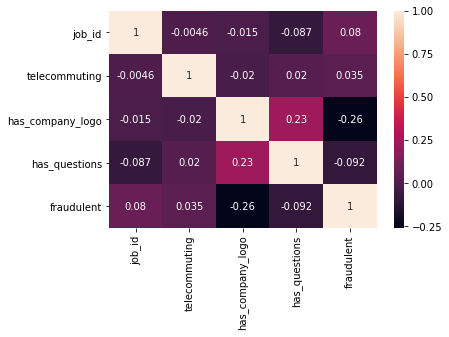

In [8]:
sns.heatmap(df.corr(), annot = True)

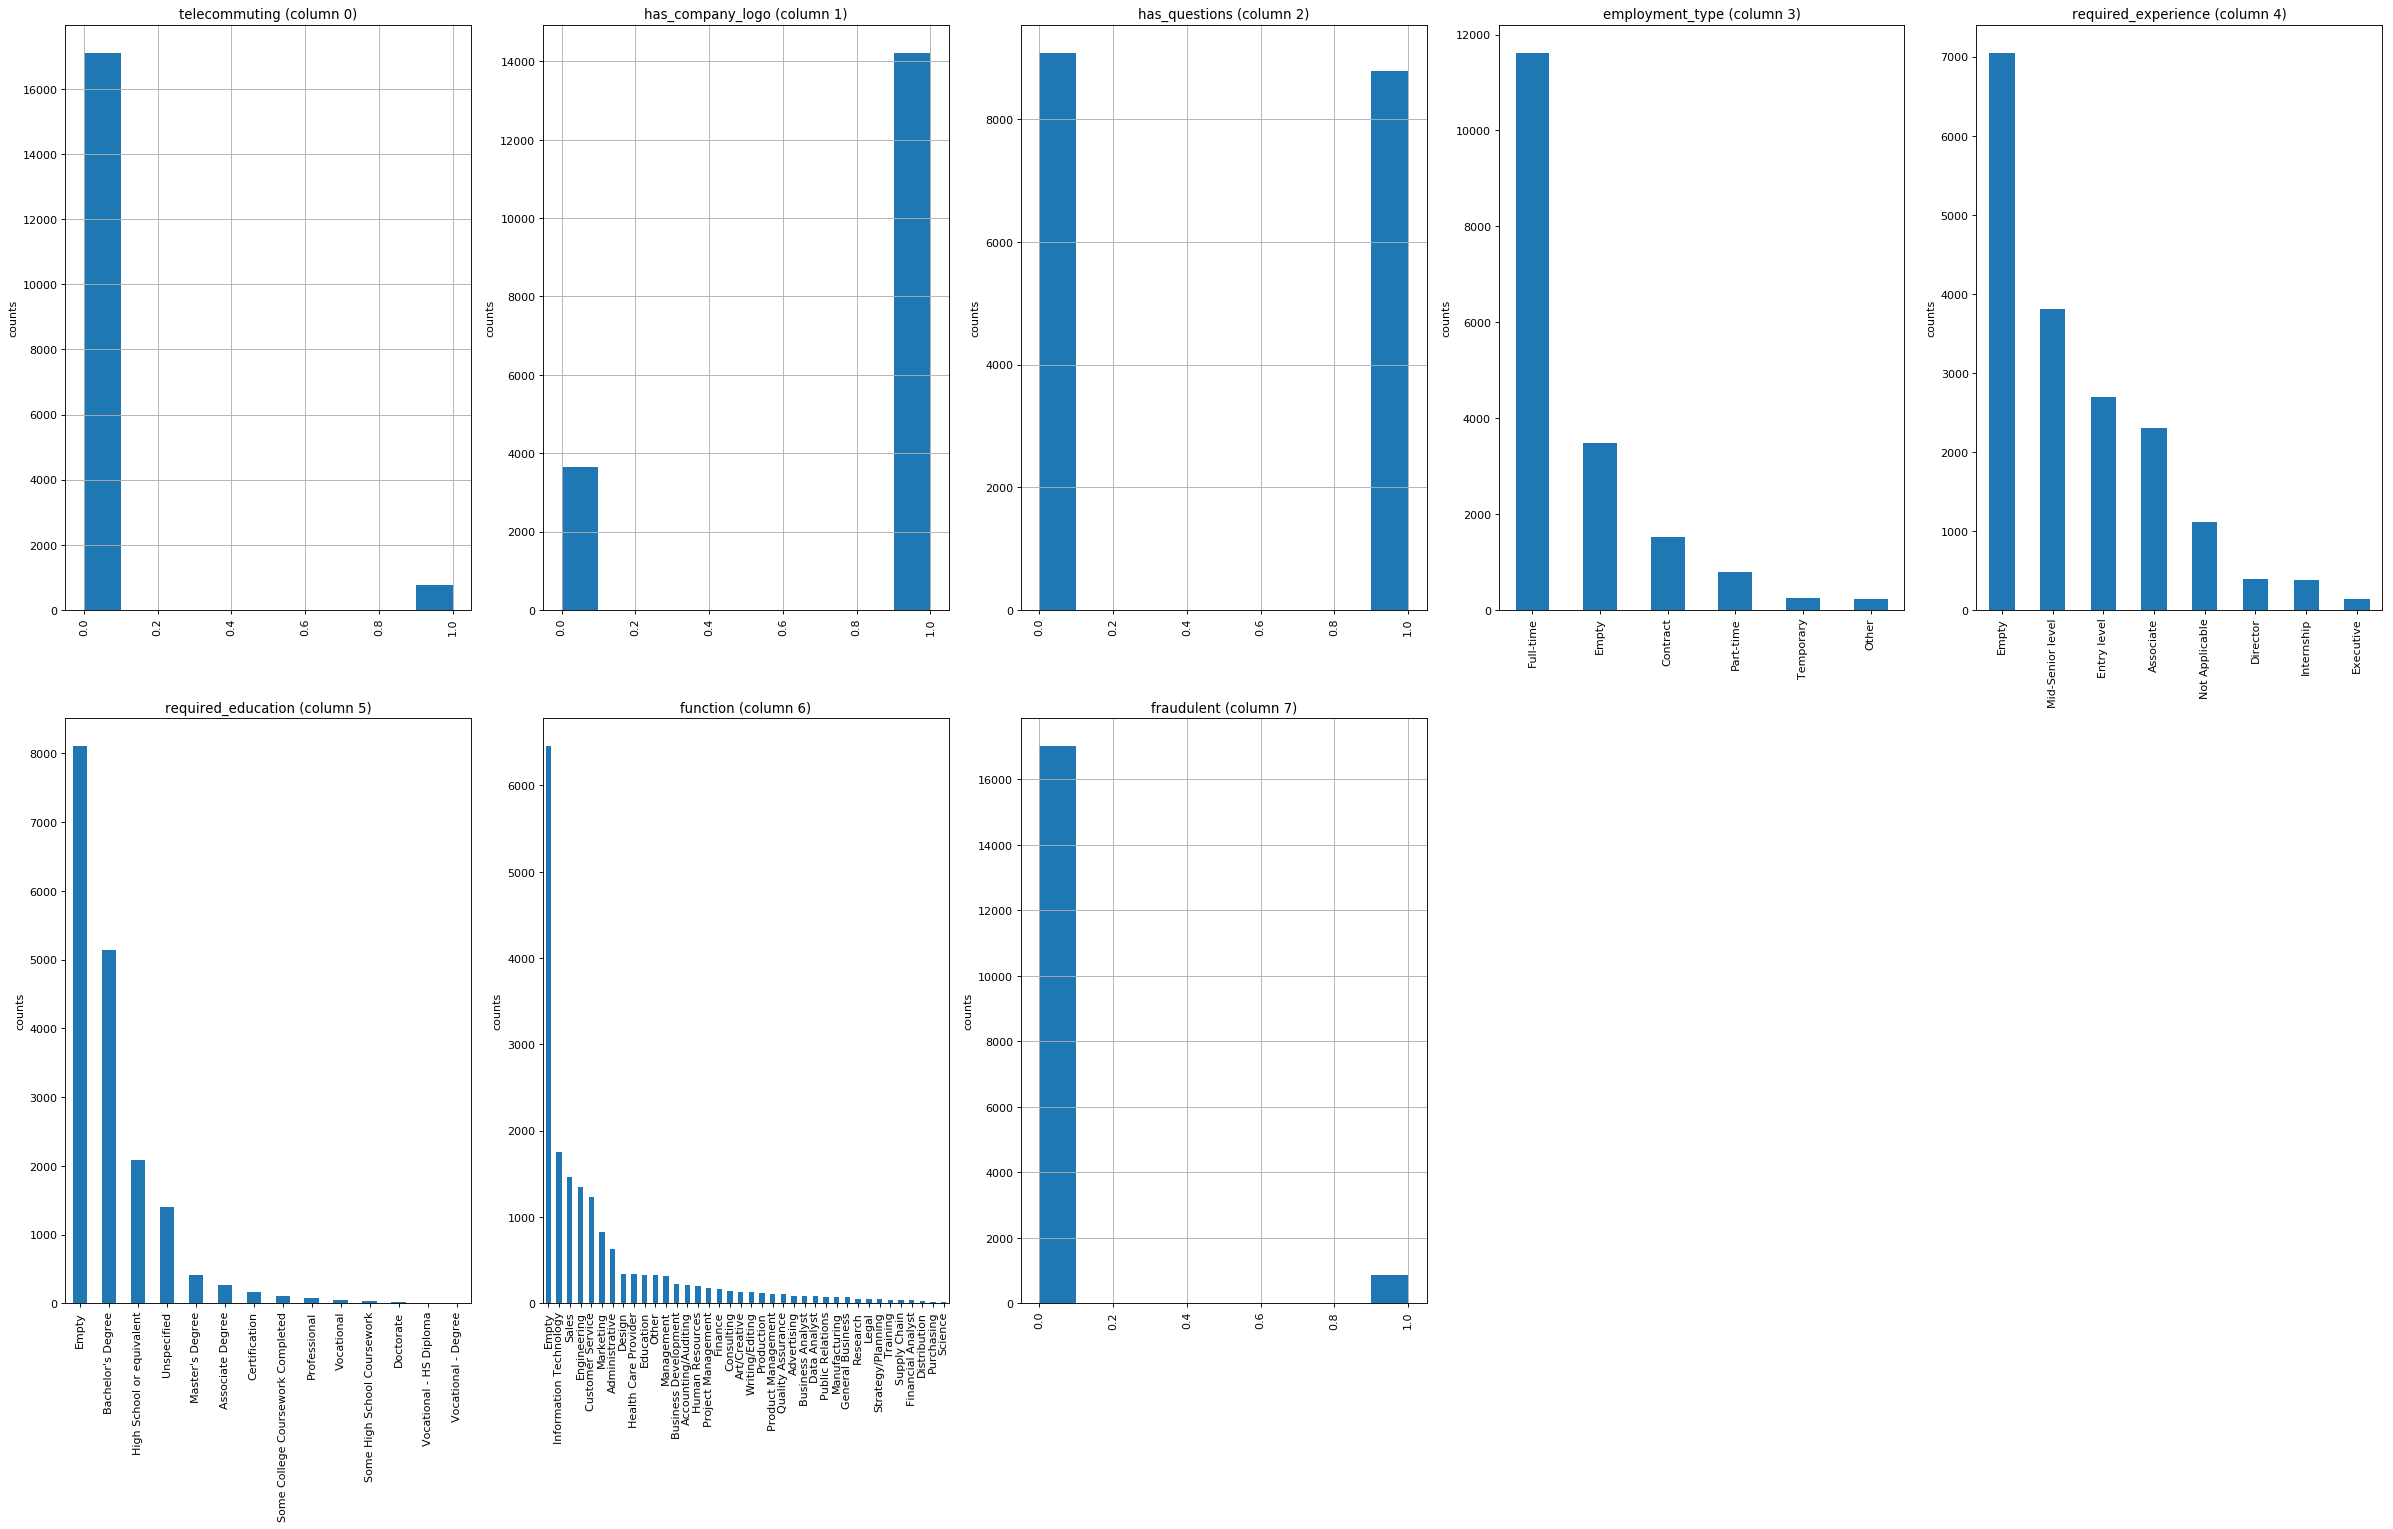

In [42]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 10, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130DD5BA6A0>,
      dtype=object)

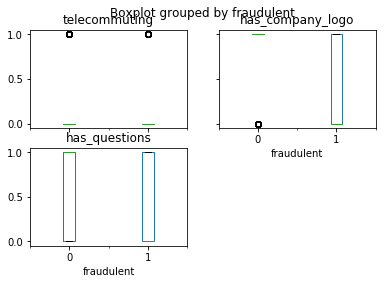

In [56]:
df.boxplot(by ='fraudulent', column =['telecommuting', 'has_company_logo', 'has_questions'], grid = False)

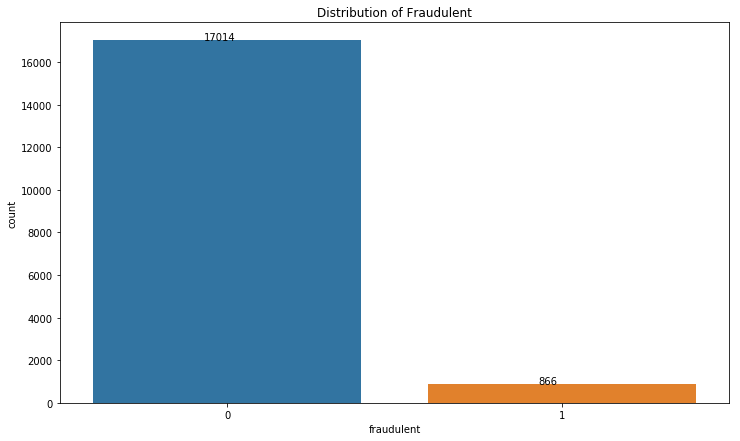

In [24]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(df.fraudulent)
plt.title('Distribution of Fraudulent')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

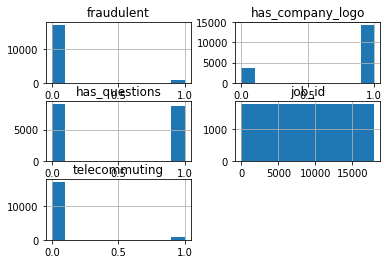

In [31]:
h = df[df.columns].hist()

In [11]:
X = df.drop("fraudulent",axis=1)
y = df.fraudulent
y = y.astype('int')

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
clf = ColumnTransformer([("one_hot", one_hot, cat_columns)], remainder="passthrough")
X_fin=clf.fit_transform(X)
np.array(X_fin)

array(<17880x51439 sparse matrix of type '<class 'numpy.float64'>'
	with 274099 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [59]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
X_fin=scaler.fit_transform(X_fin)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.2, random_state=42)

RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, random_state=42) #10!
rf_model.fit(X_train,y_train)
y_pred_rf_model=rf_model.predict(X_test)

In [62]:
print(f"Accuracy Score of RandomForest: {accuracy_score(y_test,y_pred_rf_model)}\n")

Accuracy Score of RandomForest: 0.9790268456375839



In [71]:
#GridSearch for RandomForest

rf_model = RandomForestClassifier(random_state=42)
parameters = {
  'n_estimators':np.arange(20,120,20),
} 
    
CV_rf_model = GridSearchCV(rf_model, parameters, cv=5)
CV_rf_model.fit(X_train,y_train)
CV_rf_model.best_params_
print(CV_rf_model.best_params_)

{'n_estimators': 100}


In [81]:
rf_model= RandomForestClassifier(n_estimators = 100) #100!
rf_model.fit(X_train, y_train)

y_pred_rf_model=rf_model.predict(X_test)

In [82]:
print(f"Accuracy Score of RandomForest: {accuracy_score(y_test,y_pred_rf_model)}\n")

print("Confusion Matrix of RandomForest:\n", confusion_matrix(y_test,y_pred_rf_model), "\n")

print("Classification Report of RandomForest:\n", classification_report(y_test,y_pred_rf_model))

Accuracy Score of RandomForest: 0.9837807606263982

Confusion Matrix of RandomForest:
 [[3395    0]
 [  58  123]] 

Classification Report of RandomForest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.68      0.81       181

    accuracy                           0.98      3576
   macro avg       0.99      0.84      0.90      3576
weighted avg       0.98      0.98      0.98      3576



KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [109]:
grid = GridSearchCV(knn, param_grid={'n_neighbors':range(1,15)}, scoring='accuracy', cv = 5)
grid.fit(X_train, y_train)

grid.best_params_

print(grid.best_params_)

{'n_neighbors': 2}


In [114]:
knn_res = KNeighborsClassifier(n_neighbors = 2) # 2!
knn_res.fit(X_train, y_train)

y_pred_knn = knn_res.predict(X_test)

print("Accuracy Score of KNN :", accuracy_score(y_pred_knn, y_test), "\n")

print("Confusion Matrix of KNN:\n", confusion_matrix(y_test, y_pred_knn), "\n")

print("Classification Report of KNN:\n", classification_report(y_test, y_pred_knn), "\n")

Accuracy Score of KNN : 0.9725950782997763 

Confusion Matrix of KNN:
 [[3385   10]
 [  88   93]] 

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.90      0.51      0.65       181

    accuracy                           0.97      3576
   macro avg       0.94      0.76      0.82      3576
weighted avg       0.97      0.97      0.97      3576
 



SVM

In [93]:
from sklearn import svm

svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [94]:
print("Accuracy Score of SVM :", accuracy_score(y_pred_svm, y_test), "\n")

Accuracy Score of SVM : 0.9493847874720358 



In [99]:
svm_model = svm.SVC(random_state=42)

parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
    
CV_svm_model = GridSearchCV(svm_model, parameters, cv=5)
CV_svm_model.fit(X_train,y_train)
CV_svm_model.best_params_
print(CV_svm_model.best_params_)

{'C': 100, 'gamma': 0.001}


In [100]:
svm_model = svm.SVC(C = 100, gamma = 0.001,random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [103]:
print("Accuracy Score of SVM:", accuracy_score(y_pred_svm, y_test), "\n")

print("Confusion Matrix of SVM:\n", confusion_matrix(y_test, y_pred_svm), "\n")

print("Classification Report of SVM:\n", classification_report(y_test, y_pred_svm), "\n")

Accuracy Score of SVM: 0.9790268456375839 

Confusion Matrix of SVM:
 [[3390    5]
 [  70  111]] 

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.96      0.61      0.75       181

    accuracy                           0.98      3576
   macro avg       0.97      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576
 



AdaBoost

In [85]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train,y_train)
y_pred_ab_model=ab_model.predict(X_test)

In [86]:
print(f"Accuracy Score of AdaBoost: {accuracy_score(y_test,y_pred_ab_model)}\n")

Accuracy Score of AdaBoost: 0.9793064876957495



In [87]:
ab_model = AdaBoostClassifier(random_state=42)
parameters = {
  'n_estimators':np.arange(20,120,20),
} 
    
CV_ab_model = GridSearchCV(ab_model, parameters, cv=5)
CV_ab_model.fit(X_train,y_train)
CV_ab_model.best_params_
print(CV_ab_model.best_params_)

{'n_estimators': 100}


In [88]:
ab_model = AdaBoostClassifier(n_estimators = 100, random_state=42)
ab_model.fit(X_train,y_train)
y_pred_ab_model=ab_model.predict(X_test)

print(f"Accuracy Score of AdaBoost: {accuracy_score(y_test,y_pred_ab_model)}\n")

Accuracy Score of AdaBoost: 0.988255033557047



In [90]:
print("Accuracy Score of AdaBoost:", accuracy_score(y_pred_ab_model, y_test), "\n")

print("Confusion Matrix of AdaBoost:\n", confusion_matrix(y_test, y_pred_ab_model), "\n")

print("Classification Report of AdaBoost:\n", classification_report(y_test, y_pred_ab_model), "\n")

Accuracy Score of AdaBoost: 0.988255033557047 

Confusion Matrix of AdaBoost:
 [[3386    9]
 [  33  148]] 

Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.94      0.82      0.88       181

    accuracy                           0.99      3576
   macro avg       0.97      0.91      0.93      3576
weighted avg       0.99      0.99      0.99      3576
 



DecisionTree

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Accuracy Score of DecisionTree:", accuracy_score(y_pred_dt, y_test), "\n")

print("Confusion Matrix of DecisionTree:\n", confusion_matrix(y_test, y_pred_dt), "\n")

print("Classification Report of DecisionTree:\n", classification_report(y_test, y_pred_dt), "\n")

Accuracy Score of DecisionTree: 0.985178970917226 

Confusion Matrix of DecisionTree:
 [[3380   15]
 [  38  143]] 

Classification Report of DecisionTree:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.91      0.79      0.84       181

    accuracy                           0.99      3576
   macro avg       0.95      0.89      0.92      3576
weighted avg       0.98      0.99      0.98      3576
 



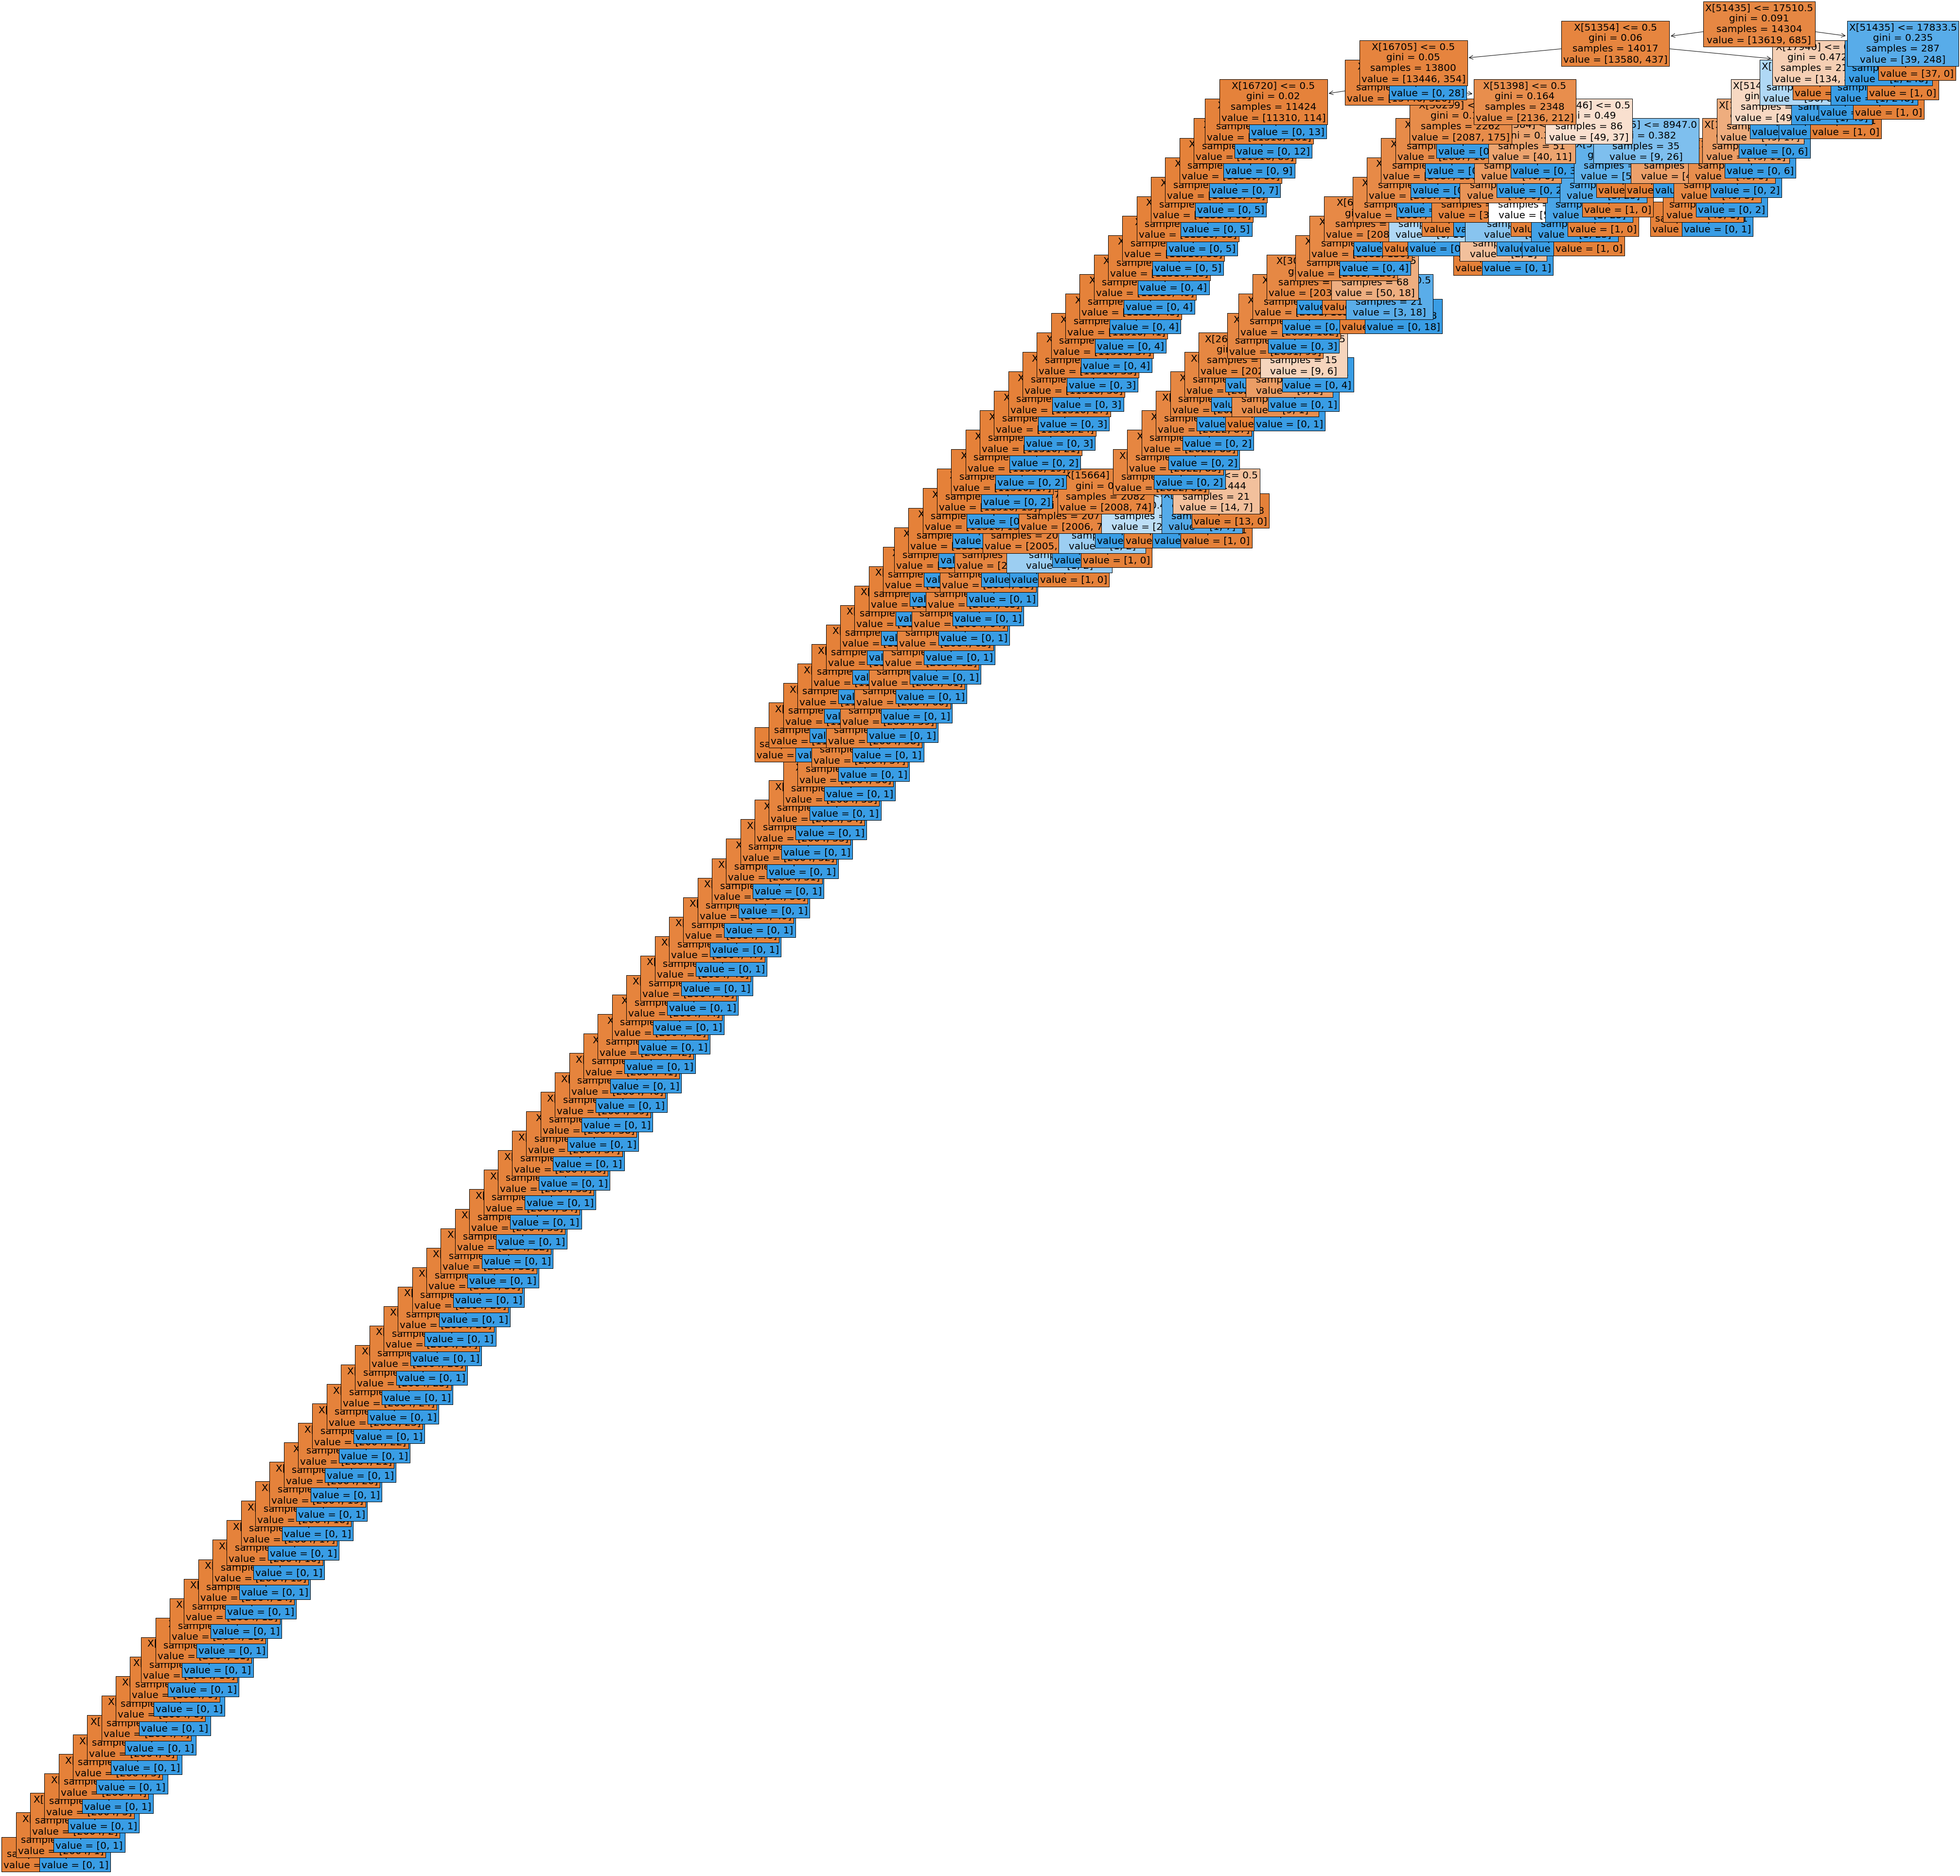

In [20]:
fig = dt_model.fit(X_train,y_train)
_, ax = plt.subplots(figsize=(70,70))
plot_tree(fig, filled=True, ax=ax, fontsize = 20)
plt.show()

Models

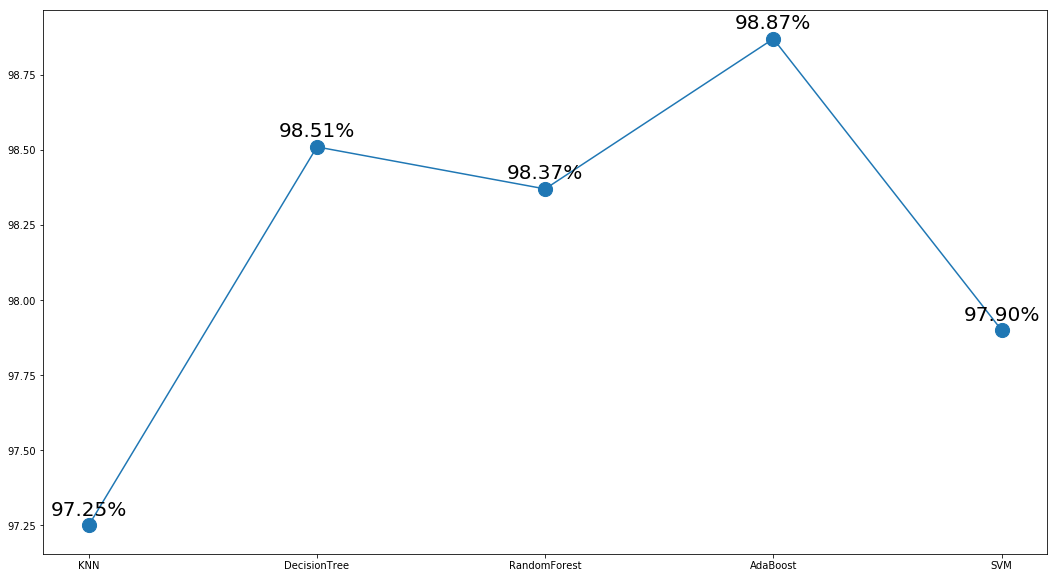

In [111]:
models=['KNN', 'DecisionTree', 'RandomForest', 'AdaBoost','SVM']
accuracies=[97.25,98.51,98.37, 98.87, 97.90]
plt.figure(figsize=(18,10))
plt.scatter(x=models, y=accuracies,s=200)
plt.plot(models,accuracies)
for x,y in zip(models,accuracies):
    label = "{:.2f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center',fontsize=20)